<a href="https://colab.research.google.com/github/young-hwanlee/CNN_Keras_MNIST/blob/master/CNN_Keras_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ** There're not much to modify since this code is written using the high-level APIs(tf.keras).**

In [ ]:
!git clone https://github.com/young-hwanlee/CNN_Keras_MNIST.git

Cloning into 'CNN_Keras_MNIST'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 33 (delta 7), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (33/33), done.


In [ ]:
ls -ltr

total 8
drwxr-xr-x 1 root root 4096 Mar  5 14:37 sample_data/
drwxr-xr-x 3 root root 4096 Mar 15 00:31 CNN_Keras_MNIST/


In [ ]:
#%%
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

## Import libraries and modules
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.python.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.python.keras import utils
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras.callbacks import ReduceLROnPlateau

## Set up the seed for reproducibility.
seed=42

# tf.reset_default_graph()           # It seems like it's only working in the old version.
# tf.set_random_seed(seed)       # It seems like it's only working in the old version.

tf.compat.v1.reset_default_graph()
tf.compat.v1.set_random_seed(seed)
np.random.seed(seed)

In [ ]:
## Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Preprocess input data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

## Reserve 10,000 samples for validation
X_train = X_train[:-10000]
y_train = y_train[:-10000]
X_val = X_train[-10000:]
y_val = y_train[-10000:]

## Preprocess class labels
# Y_train = utils.to_categorical(y_train, 10)     # It seems like it's only working in the old version.
# Y_val = utils.to_categorical(y_val, 10)            # It seems like it's only working in the old version.
# Y_test = utils.to_categorical(y_test, 10)         # It seems like it's only working in the old version.

Y_train = tf.keras.utils.to_categorical(y_train, 10)
Y_val = tf.keras.utils.to_categorical(y_val, 10)
Y_test = tf.keras.utils.to_categorical(y_test, 10)

In [ ]:
## Define model architecture
model = Sequential()
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

## Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Fit model on training data
# history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),
#                  batch_size=32, nb_epoch=10, verbose=1)           # It seems like it's only working in the old version.
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),
                 batch_size=32, epochs=10, verbose=1)

## Evaluate model on test data
score = model.evaluate(X_test, Y_test, verbose=0)

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3145 - accuracy: 0.5644 - val_loss: 0.4811 - val_accuracy: 0.8525
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6389 - accuracy: 0.8065 - val_loss: 0.3639 - val_accuracy: 0.8886
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.5374 - accuracy: 0.8349 - val_loss: 0.3147 - val_accuracy: 0.9065
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.4866 - accuracy: 0.8526 - val_loss: 0.2929 - val_accuracy: 0.9110
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.4576 - accuracy: 0.8617 - val_loss: 0.2680 - val_accuracy: 0.9195
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.4344 - accuracy: 0.8687 - val_loss: 0.2567 - val_accuracy: 0.9234
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.4261 - accuracy: 0.8714 - val_loss: 0.2455 - val_accuracy:

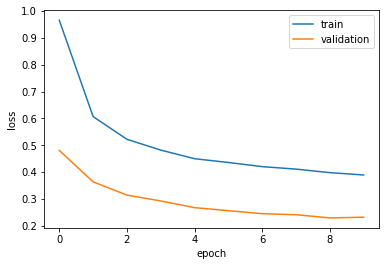

In [ ]:
#%%
## Check the results
# Plots the loss
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

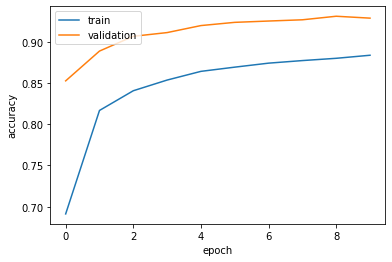

In [ ]:
# Plots the accuracy
plt.figure()
# plt.plot(history.history['acc'])                  # It seems like it's only working in the old version.
# plt.plot(history.history['val_acc'])          # It seems like it's only working in the old version.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

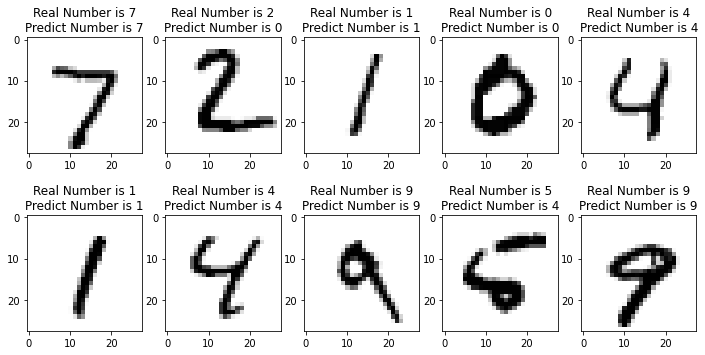

In [ ]:
## Predict using the test dataset
Y_pred = model.predict(X_test)
X_test__ = X_test.reshape(X_test.shape[0], 28, 28)

# fig, axis = plt.subplots(2, 5, figsize=(12, 14))          # The gap between the 1st row and the 2nd row is large.
fig, axis = plt.subplots(2, 5, figsize=(12,6))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='binary')
    ax.set(title = f"Real Number is {Y_test[i].argmax()}\n"
                   f"Predict Number is {Y_pred[i].argmax()}")